In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pylab as plt
import seaborn as sns
import joblib

In [2]:
center_trace = joblib.load("../../data/center_trace.pkl")
left_trace = joblib.load("../../data/left_trace.pkl")
right_trace = joblib.load("../../data/right_trace.pkl")
race_trace = joblib.load("../../data/race_trace.pkl")

In [3]:
center_trace

[{'ego_x': 20.527082,
  'ego_y': 21.708065,
  'ego_theta': 5.018921139676443,
  'ego_vel': 0.042795,
  'opp_x': 15.384091,
  'opp_y': 25.54251,
  'opp_theta': 6.212427762538176,
  'opp_vel': 0.029310808453608343,
  'selected_lane': 'center'},
 {'ego_x': 20.527211135738835,
  'ego_y': 21.7076569985742,
  'ego_theta': 5.018921139676443,
  'ego_vel': 0.137895,
  'opp_x': 15.384383374648733,
  'opp_y': 25.542489277693218,
  'opp_theta': 6.212427762538176,
  'opp_vel': 0.12441080845360834,
  'selected_lane': 'center'},
 {'ego_x': 20.527627239786195,
  'ego_y': 21.706342327313287,
  'ego_theta': 5.018921139676443,
  'ego_vel': 0.232995,
  'opp_x': 15.385624369637931,
  'opp_y': 25.542401321097138,
  'opp_theta': 6.212427762538176,
  'opp_vel': 0.21951080845360835,
  'selected_lane': 'center'},
 {'ego_x': 20.528330312142078,
  'ego_y': 21.704120986217262,
  'ego_theta': 5.018695264874215,
  'ego_vel': 0.328095,
  'opp_x': 15.387813984967593,
  'opp_y': 25.542246130211762,
  'opp_theta': 6.212

In [4]:
dataset = list()

In [5]:
for trace in [center_trace, left_trace, right_trace, race_trace]:
    for i in range(5, (len(trace)-90)//10):
        dataset.append({
            'input': np.array([[trace[idx]['opp_x'], trace[idx]['opp_y'], trace[idx]['opp_theta']] for idx in range(i*10,(i*10)+10)]),
            'target': np.array([[trace[idx]['opp_x'], trace[idx]['opp_y'], trace[idx]['opp_theta']] for idx in range((i*10)+10,(i+1)*10+80)]),
            'selected_lane': trace[0]['selected_lane']
        })

In [6]:
dataset

[{'input': array([[16.23295274, 25.48127564,  6.16760144],
         [16.25773868, 25.47839796,  6.16032458],
         [16.2825481 , 25.47533443,  6.15547282],
         [16.30738527, 25.47214505,  6.1481701 ],
         [16.33223933, 25.46876884,  6.14330195],
         [16.35711552, 25.4652662 ,  6.14086656],
         [16.38202011, 25.46169768,  6.13598353],
         [16.4069422 , 25.45800238,  6.13354107],
         [16.43188872, 25.45424116,  6.12864455],
         [16.45684843, 25.45035286,  6.12619567]]),
  'target': array([[16.4816706 , 25.4464237 ,  6.12131803],
         [16.50636977, 25.44239043,  6.11889188],
         [16.53097528, 25.43831114,  6.11405108],
         [16.55549293, 25.43412436,  6.10679752],
         [16.57992472, 25.42976964,  6.10198089],
         [16.60429088, 25.42530541,  6.09475672],
         [16.62858827, 25.42067212,  6.08995594],
         [16.65283409, 25.41592793,  6.08275106],
         [16.67702163, 25.41101393,  6.07796067],
         [16.70116636, 25.405

In [7]:
dataset_frame = pd.DataFrame(dataset)

In [8]:
dataset_frame

input  \
0     [[16.23295274308325, 25.48127564211774, 6.1676...   
1     [[16.48167060186146, 25.446423702300102, 6.121...   
2     [[16.725258958285767, 25.4007920216558, 6.0659...   
3     [[16.960618350617857, 25.344620466007235, 6.02...   
4     [[17.186139039139306, 25.278828190454547, 5.97...   
...                                                 ...   
3176  [[-31.060431556071233, 49.482500820548545, 6.1...   
3177  [[-30.657121856750628, 49.445592615560315, 6.1...   
3178  [[-30.25380967082324, 49.40868418006072, 6.198...   
3179  [[-29.850140740654563, 49.37589461073106, 6.20...   
3180  [[-29.44634618262445, 49.344690188839095, 6.20...   

                                                 target selected_lane  
0     [[16.48167060186146, 25.446423702300102, 6.121...        center  
1     [[16.725258958285767, 25.4007920216558, 6.0659...        center  
2     [[16.960618350617857, 25.344620466007235, 6.02...        center  
3     [[17.186139039139306, 25.278828190454547, 5.97...        center  
4     [[17.401643273093192, 25.20499049171079, 5.927...        center  
...                                                 ...           ...  
3176  [[-30.657121856750628, 49.445592615560315, 6.1...          race  
3177  [[-30.25380967082324, 49.40868418006072, 6.198...          race  
3178  [[-29.850140740654563, 49.37589461073106, 6.20...          race  
3179  [[-29.44634618262445, 49.344690188839095, 6.20...          race  
3180  [[-29.042432221345372, 49.31507139541022, 6.21...          race  

[3181 rows x 3 columns]

In [9]:
dataset_frame.iloc[0]['input'][:,1]

array([25.48127564, 25.47839796, 25.47533443, 25.47214505, 25.46876884,
       25.4652662 , 25.46169768, 25.45800238, 25.45424116, 25.45035286])

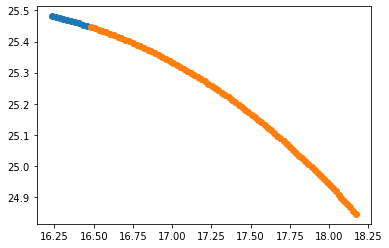

In [10]:
DATA_IDX = 0
plt.plot(dataset_frame.iloc[DATA_IDX]['input'][:,0], dataset_frame.iloc[DATA_IDX]['input'][:,1], marker='o')
plt.plot(dataset_frame.iloc[DATA_IDX]['target'][:,0], dataset_frame.iloc[DATA_IDX]['target'][:,1], marker='o')

In [11]:
dataset_frame.to_pickle("../../data/final_data.pkl")

In [12]:
from sklearn.model_selection import train_test_split
TEST_FRAC = 0.2
classes = dataset_frame['selected_lane']
train_frame, test_frame = train_test_split(dataset_frame,stratify=classes, test_size=TEST_FRAC)

In [13]:
train_frame.groupby(['selected_lane']).count()

input  target
selected_lane               
center           636     636
left             636     636
race             636     636
right            636     636

In [14]:
test_frame.groupby(['selected_lane']).count()

input  target
selected_lane               
center           159     159
left             159     159
race             159     159
right            160     160

In [15]:
train_frame.to_pickle("../../data/train_data.pkl")
test_frame.to_pickle("../../data/test_data.pkl")